In [23]:
#Normal Imports
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [24]:
#Loading the data with pandas and quick glance
path = r"C:\Users\Admin\Desktop\Python Projects QMB3302\data\Module 7 Data\ames.csv"
ames = pd.read_csv(path)
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,5,2010,WD,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2010,WD,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,4,2010,WD,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2010,WD,189900,-93.638933,42.060899


In [11]:
ames.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,...,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,55.462495,10060.208040,1969.436386,1983.274347,95.643597,4.076254,55.124741,528.537091,1022.827600,1133.857024,...,23.387484,2.495649,16.290924,1.777041,51.477414,6.117281,2007.868214,175567.643183,-93.642391,42.033730
std,33.542416,8222.759854,29.487943,20.331910,172.238250,2.222862,177.285027,417.440627,408.977848,366.442470,...,64.462225,25.230424,57.094085,31.368867,514.673800,2.629389,1.308553,70979.614441,0.026159,0.018015
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35000.000000,-93.693153,41.986498
25%,37.000000,7390.000000,1953.000000,1965.000000,0.000000,2.000000,0.000000,210.000000,784.000000,866.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,-93.661562,42.021547
50%,60.000000,9360.000000,1971.000000,1991.000000,0.000000,3.000000,0.000000,439.000000,970.000000,1060.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159000.000000,-93.640326,42.034569
75%,77.000000,11404.000000,1998.000000,2002.000000,148.000000,7.000000,0.000000,776.000000,1246.000000,1350.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2009.000000,206900.000000,-93.621485,42.047997
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,3206.000000,3820.000000,...,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,755000.000000,-93.577427,42.063381


In [ ]:
sns.pairplot(ames)
#Pairplot is GIGANTIC.too tedious to use to identify relationships

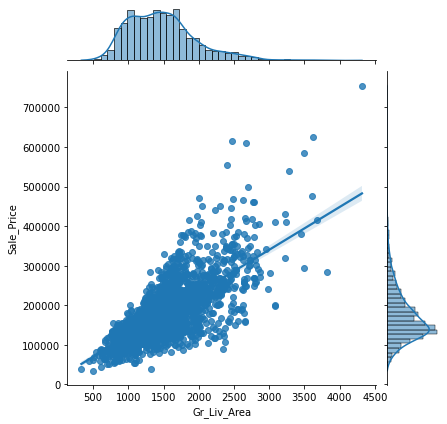

In [25]:
ames1 = ames[['Gr_Liv_Area','Sale_Price']]
sns.jointplot(x='Gr_Liv_Area',y='Sale_Price',data=ames1,kind='reg')
#isolated two quant variables for analysis, the scatter shows a positive relation

In [26]:
#setup for modeling
from sklearn.linear_model import LinearRegression
X = np.array(ames1['Gr_Liv_Area'])[:,None]
y = ames1['Sale_Price']

model = LinearRegression(fit_intercept = True)
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[108.15094044]
15784.332235751324


In [27]:
#Picked our model, Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [29]:
#Arrange Data
from sklearn.model_selection import train_test_split
X = np.array(ames1['Gr_Liv_Area'])[:,None]
y = ames1['Sale_Price']

#split the data with 70% in training
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=1955,train_size=0.7)

print("TRAINING DATA")
print("The shape of the training predictors (X) is:",Xtrain.shape)
print("The shape of the training test (y) is:",ytrain.shape)
print("TEST DATA")
print("The shape of the test predictors (X) is:", Xtest.shape)
print("The shape of the test (y) is:", ytest.shape)

TRAINING DATA
The shape of the training predictors (X) is: (1689, 1)
The shape of the training test (y) is: (1689,)
TEST DATA
The shape of the test predictors (X) is: (724, 1)
The shape of the test (y) is: (724,)


In [30]:
#Fit the model
model.fit(Xtrain,ytrain)
print(model.coef_)
print(model.intercept_)

[109.50646166]
13363.49397573169


In [31]:
#Predict
y_model = model.predict(Xtest)
y_model

#Evaluate 
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, y_model))
print('MAE : %.2F' 
      % mean_absolute_error(ytest, y_model))
print('RMSE : %.2f'
      % np.sqrt(mean_squared_error(ytest, y_model)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ytest, y_model))


Coefficients: 
 [109.50646166]
Mean squared error: 2387489650.90
MAE : 33933.54
RMSE : 48861.94
Coefficient of determination: 0.50


In [ ]:
#Coefficient of determination could be better, lets try using 

In [33]:
#Using more features to predict sales price
#Pick Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
#Arrange Data
X = ames[['Gr_Liv_Area',"Total_Bsmt_SF",'Garage_Cars']]
y = ames['Sale_Price']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state =1955,train_size=0.7)



In [34]:
#Fit Model
model.fit(Xtrain, ytrain)

print(model.coef_)
print(model.intercept_)
#Predict
y_model = model.predict(Xtest)

#Evaluate

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, y_model))
print('MAE : %.2F' 
      % mean_absolute_error(ytest, y_model))
print('RMSE : %.2f'
      % np.sqrt(mean_squared_error(ytest, y_model)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ytest, y_model))

[   70.09304224    59.55320543 25428.48180851]
-33034.71391539875
Coefficients: 
 [   70.09304224    59.55320543 25428.48180851]
Mean squared error: 1337422800.80
MAE : 25193.36
RMSE : 36570.79
Coefficient of determination: 0.72


In [ ]:
#Much better coefficient of determination with model using extra features. MAE and RMSE have been reduced as well